### TASK 1 : Merge all csv files into one data frame

In [10]:
import pandas as pd
import glob

''' TASK 1 : Merge 12 csv files into one data frame'''
all_months_data = pd.DataFrame()

for file in glob.glob('Sales_Data/*.csv'):
    temp = pd.read_csv(file)
    all_months_data = pd.concat((all_months_data, temp))
    
print(all_months_data.shape)
all_months_data.head()  

all_months_data.to_csv("all_data.csv", index=False)

(186850, 6)


In [133]:
### Read complete Data
all_data = pd.read_csv('all_data.csv')
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


### Data Clean Up

In [134]:
## Clean up Data
all_data[all_data.isna().any(axis=1)]
all_data.dropna(inplace=True)

all_data[all_data.isna().any(axis=1)]  # No more NAN values

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [135]:
all_data = all_data[all_data['Order Date'].str[0:2] != "Or"]  # Removes all headers added as rows
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data["Order ID"] = pd.to_numeric(all_data["Order ID"])

### Task 2 : What was the best month for Sales? How much was earned in that month?

In [136]:
''' TASK 2 : What was the best month for Sales? How much was earned in that month? '''
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"].astype('int32')  # Now all months are integers

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


Text(0.5, 1.0, 'Sales in each Month')

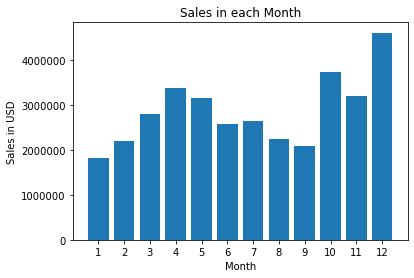

In [137]:
all_data["Sales"] = all_data["Quantity Ordered"].astype('int32') * all_data["Price Each"].astype('float32')
all_data.head()

sales_data = all_data[["Month", "Sales"]]
result = sales_data.groupby("Month").sum()

result.to_csv("Highest-Month-Sales.csv")

## Plots
import matplotlib.pyplot as plt
%matplotlib inline

months = range(1, 13)
plt.bar(months, result["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD")
plt.xlabel("Month")
plt.title("Sales in each Month")

#### Answer : December was the best month for Sales! With '4613443.50' Dollars worth of sales

### TASK 3 : Which city had the highest number of Sales?

[' Atlanta, GA', ' Austin, TX', ' Boston, MA', ' Dallas, TX', ' Los Angeles, CA', ' New York City, NY', ' Portland, ME', ' Portland, OR', ' San Francisco, CA', ' Seattle, WA']
                           Sales
City                            
 Atlanta, GA        2.795498e+06
 Austin, TX         1.819582e+06
 Boston, MA         3.661642e+06
 Dallas, TX         2.767976e+06
 Los Angeles, CA    5.452571e+06
 New York City, NY  4.664318e+06
 Portland, ME       4.497583e+05
 Portland, OR       1.870732e+06
 San Francisco, CA  8.262204e+06
 Seattle, WA        2.747756e+06


([<matplotlib.axis.XTick at 0x17db8fc8198>,
 <a list of 10 Text xticklabel objects>)

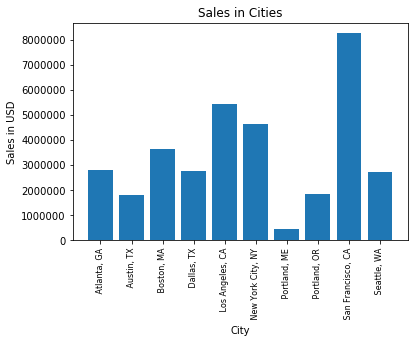

In [138]:
''' Add a City column to the data '''
## Use of APPLY method!!
def get_city(address):
    address = address.split(',')
    state = address[2].split(' ')[1]
    return address[1] + ', ' + state

all_data["City"] = all_data["Purchase Address"].apply(lambda x: get_city(x))
all_data.head()

city_sales = all_data[["Sales", "City"]]
results = city_sales.groupby("City").sum()

# cities = all_data["City"].unique()
# cities = all_data.sort_values(["City"])["City"].unique()
cities = [city for city, df in all_data.groupby("City")]
print(cities)
print(results)

results.to_csv("Highest-City-Sales.csv")

plt.xlabel("City")
plt.ylabel("Sales in USD")
plt.title("Sales in Cities")
plt.bar(cities, results["Sales"])
plt.xticks(cities, rotation='vertical', size=8)

### Answer: San Francisco has the highest sales in that year!

### TASK 4 : What time should advertisements be displayed to maximize likelihood of a customer buying the product?

In [139]:
''' Use Datetime library'''
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.900000,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.989998,"Boston, MA"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.000000,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.990000,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.990000,"Los Angeles, CA"


Text(0, 0.5, '# of items bought')

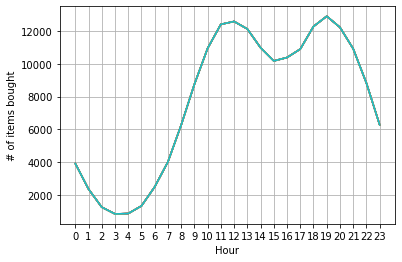

In [140]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head()

hours = [hour for hour, df in all_data.groupby("Hour")]
minutes = [minute for minute, df in all_data.groupby("Minute")]

plt.plot(hours, all_data.groupby("Hour").count())
plt.xticks(hours)
plt.grid()
plt.xlabel("Hour")
plt.ylabel("# of items bought")

### TASK 5 : What products are most often sold together?

In [194]:
''' Find duplicated Order ID. That would help us understand which products were most often bought together '''
double_order = all_data[all_data.duplicated('Order ID', keep=False)]
double_order = double_order[["Order ID", "Product"]]
double_order["Product"] = double_order["Product"].apply(lambda x: x + ', ')

result = double_order.groupby("Order ID").sum()
result["Count"] = 1
result = result.groupby("Product").count()
result.sort_values("Count", inplace=True, ascending=False)

result.to_csv("pair-products.csv")
result.head()

,Count
Product,
"iPhone, Lightning Charging Cable,",882
"Google Phone, USB-C Charging Cable,",856
"iPhone, Wired Headphones,",361
"Vareebadd Phone, USB-C Charging Cable,",312
"Google Phone, Wired Headphones,",303


In [212]:
''' Find duplicated Order ID. That would help us understand which products were most often bought together '''
double_order = all_data[all_data.duplicated('Order ID', keep=False)]
double_order = double_order[["Order ID", "Sales", "Product"]]

double_order.head()

,Order ID,Sales,Product
3,176560,600.000000,Google Phone
4,176560,11.990000,Wired Headphones
18,176574,600.000000,Google Phone
19,176574,11.950000,USB-C Charging Cable
30,176585,99.989998,Bose SoundSport Headphones


In [213]:
double_order["Grouped"] = double_order.groupby("Order ID")["Product"].transform(lambda x: ', '.join(x))
double_order = double_order[double_order.duplicated('Order ID')]
result = double_order.groupby("Grouped").count()

In [219]:
result.sort_values("Product", ascending=False, inplace=True)
result.head()

,Order ID,Sales,Product
Grouped,,,
"iPhone, Lightning Charging Cable",882,882,882
"Google Phone, USB-C Charging Cable",856,856,856
"iPhone, Wired Headphones",361,361,361
"Vareebadd Phone, USB-C Charging Cable",312,312,312
"Google Phone, Wired Headphones",303,303,303


### TASK 5 completed using transform and apply methods. As the results show, the products most often sold together are the iPhone and Lightning Charging Cable

### TASK 6 : What product sold the most? Why do you think it sold the most?

In [233]:
df = all_data[["Product", "Quantity Ordered"]]
result = df.groupby("Product").sum()
# result.sort_values("Quantity Ordered", inplace=True, ascending=False)
# result.head(5)

[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

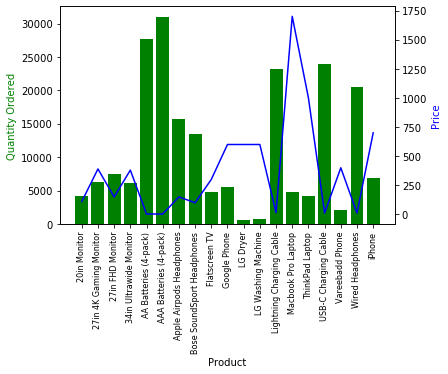

In [262]:
products = [product for product, df in all_data.groupby("Product")]
price = all_data.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, result["Quantity Ordered"], color='g')
ax2.plot(products, price, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

### Seems like the quantity sold is inversely proportional to the price of the product. Though, this does not hold for all products.